# Homework 2

In this homework, you will be working with the Lahman baseball statistics database. This database contains pitching, hitting, and fielding statistics for Major League Baseball from 1871 through 2016.  It includes data from the two current leagues (American and National), the four other "major" leagues (American Association, Union Association, Players League, and Federal League), and the National Association of 1871-1875. 

You will be working with the sqlite version of the Lahman database, which is avaiable at https://github.com/jknecht/baseball-archive-sqlite . Download the <b>2016</b> database file. You will be using some of the tables in this database for this homework.  

For documentation about the data and its tables, see http://www.seanlahman.com/files/database/readme2017.txt . Note that the documentation is for a dataset that includes the 2017 data, but most of it applies to the 2016 dataset. One difference is that the <i><b>People</i></b> table is named <i><b>Master</i></b> in the 2016 dataset. 

You need to use SQL queries and the framework used in Lecture 4 (sqlite3, pandas, matplotlib, seaborn) for this homework. 

Your submission should be an ipynb file named <i><b>YourFirstInitialLastname.ipynb</i></b> . A student named John Doe will have a submission named JDoe.ipynb . You must use Python code to provide your solutions. Label the solution to each part in the homework appropriately (E.g. using Markdown cells or # for comments) so that the TA can easily identify each part and assign points correctly. 

## Part I (10 points)

(i) Display the names of the tables in the database.

(ii) Display the names of the columns in the table Master. 

(iii) Display the number of rows in the table Master.

(iv) Display the nameFirst and nameLast for players whose weight is greater than 280. 

In [96]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sqlite3 import Error

def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None
 

In [97]:
pwd

'/Users/dsarachaga/Google Drive/Rutgers/MSDS Data Management'

In [98]:
# create a database connection
connection = sqlite3.connect('lahman2016.sqlite')
cursor = connection.cursor()

In [99]:
#(i) Display the names of the tables in the database.
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", connection)

,name
0,AllstarFull
1,Appearances
2,AwardsManagers
3,AwardsPlayers
4,AwardsShareManagers
5,AwardsSharePlayers
6,Batting
7,BattingPost
8,CollegePlaying
9,Fielding


In [100]:
#(ii) Display the names of the columns in the table Master. 

master_table = pd.read_sql_query("SELECT * FROM Master", connection)
for col in master_table.columns: 
    print(col) 

playerID
birthYear
birthMonth
birthDay
birthCountry
birthState
birthCity
deathYear
deathMonth
deathDay
deathCountry
deathState
deathCity
nameFirst
nameLast
nameGiven
weight
height
bats
throws
debut
finalGame
retroID
bbrefID


In [101]:
#(iii) Display the number of rows in the table Master.
pd.read_sql_query("SELECT count(*) FROM Master", connection)

,count(*)
0,19105


In [102]:
#(iv) Display the nameFirst and nameLast for players whose weight is greater than 280. 
pd.read_sql_query("SELECT nameFirst, nameLast FROM Master WHERE weight > 280", connection)

,nameFirst,nameLast
0,Jumbo,Brown
1,Jonathan,Broxton
2,Bartolo,Colon
3,Adam,Dunn
4,Jeff,Niemann
5,Chad,Paronto
6,Calvin,Pickering
7,Jon,Rauch
8,Tyler,Robertson
9,CC,Sabathia


## Part II (20 points)

(i) Group players in the Master table with the same birthyear, and report the birthyear, the average height, and the number of players for each birthyear. Order the results by birthyear ascending. Save the results into a Pandas DataFrame. 

(ii) Plot the results in (i) using a lineplot with the average height on the y axis and year on the x-axis. 


(iii) Do the same as in (i), but now only include groups with an average height > 70. 

(iv) Plot the results as in Part (ii)

In [108]:
#(i) Group players in the Master table with the same birthyear, and report the birthyear, the average height, 
#and the number of players for each birthyear. Order the results by birthyear ascending. 
#Save the results into a Pandas DataFrame.

players_by_birthYear = pd.read_sql_query("SELECT birthYear, avg(height) as avg_height, count(*) as number_players " +
                                         "FROM Master " +
                                         "GROUP BY birthYear " +
                                         "ORDER BY birthYear ASC", connection)

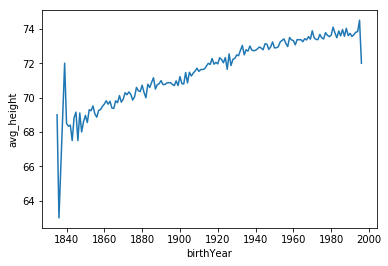

In [109]:
#(ii) Plot the results in (i) using a lineplot with the average height on the y axis and year on the x-axis. 
sns.lineplot(y="avg_height", x="birthYear", data=players_by_birthYear)

In [112]:
#(iii) Do the same as in (i), but now only include groups with an average height > 70. 
players_by_birthYear70 = pd.read_sql_query("SELECT birthYear, avg(height) as avg_height, count(*) as number_players " +
                                         "FROM Master " + 
                                         "GROUP BY birthYear " +
                                         "HAVING avg_height > 70 " +
                                         "ORDER BY birthYear", connection)

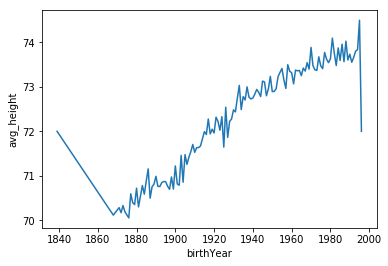

In [113]:
#(iv) Plot the results as in Part (ii)
sns.lineplot(y="avg_height", x="birthYear", data=players_by_birthYear70)

## Part III (20 points)

(i) Find the namefirst, namelast, playerid and yearid of all players who were successfully inducted into the Hall of Fame in descending order of yearid. Save the results into a Pandas DataFrame.

(ii) Display the first 10 rows of the dataframe in (i). 

(iii) Display the total number of rows of the dataframe in (i).


(iv) Find the people who were successfully inducted into the Hall of Fame and played in college at a school located in the state of California. For each person, return their namefirst, namelast, playerid, school name (name_full), and yearid in descending order of yearid. Break ties on yearid by school name (ascending). yearid refers to the year of induction into the Hall of Fame. Save the results in a dataframe and display the entire dataframe. 

In [114]:
#(i) Find the namefirst, namelast, playerid and yearid of all players who were successfully inducted 
#into the Hall of Fame in descending order of yearid. Save the results into a Pandas DataFrame.

#First I look at the Hall of Fame table structure
hall_fame_table = pd.read_sql_query("SELECT * FROM HallOfFame", connection)
hall_fame_table.head()


,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,aaronha01,1982,BBWAA,415.0,312.0,406.0,Y,Player,None
1,abbotji01,2005,BBWAA,516.0,387.0,13.0,N,Player,None
2,adamsba01,1937,BBWAA,201.0,151.0,8.0,N,Player,None
3,adamsba01,1938,BBWAA,262.0,197.0,11.0,N,Player,None
4,adamsba01,1939,BBWAA,274.0,206.0,11.0,N,Player,None


In [115]:
hall_fame_table = pd.read_sql_query("SELECT a.namefirst, a.namelast, a.playerid, b.yearid" +
                                    " FROM Master a" +
                                    " INNER JOIN HallOfFame b ON a.playerID = b.playerID" +
                                    " WHERE b.inducted = 'Y'"
                                    " ORDER BY b.yearid DESC", connection)

In [117]:
#(ii) Display the first 10 rows of the dataframe in (i).
hall_fame_table.head(10)

,nameFirst,nameLast,playerID,yearid
0,Jeff,Bagwell,bagweje01,2017
1,Tim,Raines,raineti01,2017
2,Ivan,Rodriguez,rodriiv01,2017
3,John,Schuerholz,schurjo99,2017
4,Bud,Selig,seligbu99,2017
5,Ken,Griffey,griffke02,2016
6,Mike,Piazza,piazzmi01,2016
7,Craig,Biggio,biggicr01,2015
8,Randy,Johnson,johnsra05,2015
9,Pedro,Martinez,martipe02,2015


In [118]:
#(iii) Display the total number of rows of the dataframe in (i).
hall_fame_table.shape[0]

317

In [21]:
#(iv) Find the people who were successfully inducted into the Hall of Fame and played in college at a school 
# located in the state of California. For each person, return their namefirst, namelast, playerid, school name 
# (name_full), and yearid in descending order of yearid. Break ties on yearid by school name (ascending). 
# yearid refers to the year of induction into the Hall of Fame. Save the results in a dataframe and display 
# the entire dataframe. 

#First I look at the Schools table structure
schools_table = pd.read_sql_query("SELECT * FROM Schools", connection)
schools_table.head()

,schoolID,name_full,city,state,country
0,abilchrist,Abilene Christian University,Abilene,TX,USA
1,adelphi,Adelphi University,Garden City,NY,USA
2,adrianmi,Adrian College,Adrian,MI,USA
3,akron,University of Akron,Akron,OH,USA
4,alabama,University of Alabama,Tuscaloosa,AL,USA


In [119]:
hall_fame_table_CA = pd.read_sql_query("SELECT distinct a.namefirst, a.namelast, a.playerid,"+
                                       " d.name_full as schoolName, b.yearid" +
                                    " FROM Master a" +
                                    " INNER JOIN HallOfFame b ON a.playerID = b.playerID" +
                                    " INNER JOIN CollegePlaying c ON a.playerID = c.playerID" +
                                    " INNER JOIN Schools d ON c.schoolID = d.schoolID" +
                                    " WHERE b.inducted = 'Y'and d.state = 'CA'"
                                    " ORDER BY b.yearid DESC, schoolName ASC", connection)
hall_fame_table_CA

,nameFirst,nameLast,playerID,schoolName,yearid
0,Randy,Johnson,johnsra05,University of Southern California,2015
1,Pat,Gillick,gillipa99,Los Angeles Valley College,2011
2,Pat,Gillick,gillipa99,University of Southern California,2011
3,Doug,Harvey,harvedo99,San Diego State University,2010
4,Dick,Williams,willidi02,Pasadena City College,2008
5,Tony,Gwynn,gwynnto01,San Diego State University,2007
6,Ozzie,Smith,smithoz01,"California Polytechnic State University, San L...",2002
7,Tom,Seaver,seaveto01,Fresno City College,1992
8,Tom,Seaver,seaveto01,University of Southern California,1992
9,Joe,Morgan,morgajo02,Merritt College,1990


## Part IV (20 points)

Find the namefirst, namelast, playerid, yearid, and single-year slg (Slugging Percentage) of the players and save the results in a dataframe. For statistical significance, only include players with more than 50 at-bats in the season. Order the results by slg descending. 

Display the players with the 10 best annual Slugging Percentage recorded over all time. 

Slugging Percentage is not provided in the database. It can be computed using a formula given at https://en.wikipedia.org/wiki/Slugging_percentage and the data in the database. Note that there is one term in the formula that is not directly available as a column in the database. You will have to compute it using some of the columns. 

Also, you have to compute slg as a floating point number, so make sure to use SQL in a way to get this. 

In [23]:
batting_table = pd.read_sql_query("SELECT * FROM Batting", connection)
batting_table.head()

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,None,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,None
1,aardsda01,2006,1,CHN,NL,45,None,2,0,0,...,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,None
2,aardsda01,2007,1,CHA,AL,25,None,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,None
3,aardsda01,2008,1,BOS,AL,47,None,1,0,0,...,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,None
4,aardsda01,2009,1,SEA,AL,73,None,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,None


In [121]:
batting_table10 = pd.read_sql_query("SELECT distinct a.nameFirst, a.nameLast, a.playerid, b.yearID, b.single_year_slg "+
                                    "FROM Master a " +
                                    "INNER JOIN " +
                                    "(SELECT yearID, playerid, " +
                                  "MAX(CAST((H-\"2B\"-\"3B\"-HR)+2*\"2B\"+3*\"3B\"+4*HR as float)/AB) as single_year_slg " + 
                                  "FROM Batting " +
                                  "WHERE AB > 50 " +
                                  "GROUP BY yearID " +
                                  "ORDER BY single_year_slg DESC " +
                                  "LIMIT 10) as b " +
                                  "WHERE a.playerID=b.playerID", connection)
batting_table10

,nameFirst,nameLast,playerID,yearID,single_year_slg
0,Shane,Spencer,spencsh01,1998,0.910448
1,Ted,Williams,willite01,1953,0.901099
2,Barry,Bonds,bondsba01,2001,0.863445
3,Babe,Ruth,ruthba01,1920,0.849015
4,Babe,Ruth,ruthba01,1921,0.846296
5,Jeff,Baker,bakerje03,2006,0.824561
6,Barry,Bonds,bondsba01,2004,0.812332
7,Barry,Bonds,bondsba01,2002,0.799007
8,Babe,Ruth,ruthba01,1927,0.772222
9,Glenallen,Hill,hillgl01,1993,0.770115


## Part V (20 points)

(i) Find the yearid, min, max, and average of all player salaries for each year recorded, ordered by yearid in ascending order. Save the results as a dataframe and display it. 

(ii) For the player salaries in 2016, display a histogram with 10 bins. You may use the dataframe.hist(bin=10) function to do this. Also, it may be nicer to divide the salaries by 1,000,000 to show the amounts in millions. 

In [47]:
salary_table = pd.read_sql_query("SELECT * FROM Salaries", connection)
salary_table.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000.0
1,1985,ATL,NL,bedrost01,550000.0
2,1985,ATL,NL,benedbr01,545000.0
3,1985,ATL,NL,campri01,633333.0
4,1985,ATL,NL,ceronri01,625000.0


In [122]:
#(i) Find the yearid, min, max, and average of all player salaries for each year recorded, 
# ordered by yearid in ascending order. Save the results as a dataframe and display it. 

salary_table = pd.read_sql_query("SELECT yearID, min(salary) as min_salary, max(salary) as max_salary, "
                                 "round(avg(salary),0) as avg_salary " +
                                 "FROM Salaries " +
                                 "GROUP BY yearID " +
                                 "ORDER BY yearID ASC ", connection)
salary_table

,yearID,min_salary,max_salary,avg_salary
0,1985,60000.0,2130300.0,476299.0
1,1986,60000.0,2800000.0,417147.0
2,1987,62500.0,2127333.0,434729.0
3,1988,62500.0,2340000.0,453171.0
4,1989,62500.0,2766667.0,506323.0
5,1990,100000.0,3200000.0,511974.0
6,1991,100000.0,3800000.0,894961.0
7,1992,109000.0,6100000.0,1047521.0
8,1993,0.0,6200000.0,976967.0
9,1994,50000.0,6300000.0,1049589.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f0d2c18>]],
      dtype=object)

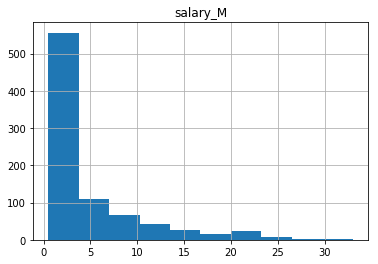

In [124]:
#(ii) For the player salaries in 2016, display a histogram with 10 bins. 
#You may use the dataframe.hist(bin=10) function to do this. 
#Also, it may be nicer to divide the salaries by 1,000,000 to show the amounts in millions. 

salary_table2016 = pd.read_sql_query("SELECT playerID, round(salary/1000000,1) as salary_M " +
                                 "FROM Salaries " +
                                 "WHERE yearID = 2016", connection)

salary_table2016.hist(bins=10) 

## Part VI (10 points)

Extract and display a facet of the dataset that you think is interesting. This should not be a facet from Parts I-V. 

In [125]:
collegePlaying_table = pd.read_sql_query("SELECT * FROM CollegePlaying", connection)
collegePlaying_table.head()

,playerID,schoolID,yearID
0,aardsda01,pennst,2001
1,aardsda01,rice,2002
2,aardsda01,rice,2003
3,abadan01,gamiddl,1992
4,abadan01,gamiddl,1993


In [127]:
collegePlayers_table = pd.read_sql_query("SELECT state, city, name_full, count(distinct playerID) total_players " +
                                         "FROM CollegePlaying a " +
                                         "INNER JOIN Schools b ON a.schoolID = b.schoolID " +
                                         "GROUP BY state, city, name_full " +
                                         "ORDER BY total_players DESC", connection)
collegePlayers_table.head(10)

# I believe that an interesting facet is to see which are the universities that have more players on the MLB
# So, what I extracted here are the top 10 Universities where MLB players attended.

,state,city,name_full,total_players
0,TX,Austin,University of Texas at Austin,107
1,CA,Los Angeles,University of Southern California,105
2,AZ,Tempe,Arizona State University,101
3,CA,Palo Alto,Stanford University,86
4,MI,Ann Arbor,University of Michigan,76
5,CA,Los Angeles,"University of California, Los Angeles",70
6,AZ,Tucson,University of Arizona,68
7,LA,Baton Rouge,Louisiana State University,66
8,MA,Worcester,College of the Holy Cross,64
9,FL,Tallahassee,Florida State University,61
